Using the Youtube collection in question, combine the 1 and -1 classes into one and perform classification using the SVM (linear kernel) method, comparing the subjective class (1 and -1) with the objective class (0). Conduct the research for reasonably similar numbers of posts from each class (e.g., 500 and 500). 

In [47]:
# importing libraries
import pandas as pd
import numpy as np
import tmtoolkit as tm
from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
import matplotlib.pyplot as plt

import kagglehub
from kagglehub import KaggleDatasetAdapter

In [48]:
# dataset source: https://www.kaggle.com/datasets/advaypatil/youtube-statistics?resource=download
df = pd.read_csv('Lab_5_docs/comments.csv')

# 0 - negative sentiment
# 1 - neutral sentiment
# 2 - positive sentiment
df = df[['Comment', 'Sentiment']]
df = df.sort_values(by = 'Sentiment').reset_index(drop=True)
df

Comment  Sentiment
0                        1 wrong move and it's all gone.        0.0
1      Just stunning that the party once proud of sta...        0.0
2      Goldmine or not, accepting this concept as the...        0.0
3      Why do we need a metaverse? Why are we doing t...        0.0
4      imposter syndrome is SO REAL! i think that tie...        0.0
...                                                  ...        ...
18404  Thank you for stopping by put outlawrp I love ...        2.0
18405  lol great video icy, you never fail to make me...        2.0
18406  *Important Update* : Most of my videos will no...        2.0
18407  Let’s take a moment to appreciate the other ch...        2.0
18408  This is great. Focus is key. A playful approac...        2.0

[18409 rows x 2 columns]

In [49]:
# get comments with strong opinion
df_opinion = pd.concat([df.head(1500), df.tail(1500)])
df_opinion['Sentiment']=0

df_neutral = df.loc[df['Sentiment']==1].sample(n=3000)

df_full = pd.concat([df_opinion,df_neutral])
df_full = df_full.dropna()
df_full

Comment  Sentiment
0                       1 wrong move and it's all gone.        0.0
1     Just stunning that the party once proud of sta...        0.0
2     Goldmine or not, accepting this concept as the...        0.0
3     Why do we need a metaverse? Why are we doing t...        0.0
4     imposter syndrome is SO REAL! i think that tie...        0.0
...                                                 ...        ...
5330  Ape..aege...thiyena....keeli...tika....aran......        1.0
5090  i think that this vedha by hrithik is much mor...        1.0
2838             klopp really being modern day mourinho        1.0
2849         4:03 my man just said Virgin van Dijk lmao        1.0
4244  Brent’s face tho when Andrew said “We already ...        1.0

[6000 rows x 2 columns]

In [50]:
# create corpus, add sentiment attribute
corp = tm.corpus.Corpus(dict(zip(range(6000), df_full.Comment)), language = "en", load_features=[])
tm.corpus.set_document_attr(corp, attrname = "Sentiment", data = dict(zip(corp.doc_labels, df_full.Sentiment)))

tm.corpus.print_summary(corp)

Corpus with 6000 documents in English
> 0 (9 tokens): 1 wrong move and it 's all gone .
> 1 (41 tokens): Just stunning that the party once proud of standin...
> 2 (25 tokens): Goldmine or not , accepting this concept as the fu...
> 3 (26 tokens): Why do we need a metaverse ? Why are we doing this...
> 4 (38 tokens): imposter syndrome is SO REAL ! i think that ties b...
> 5 (14 tokens): I ca n't stress this enough . Pricing does not alw...
> 6 (28 tokens): People are dying out of hunger but some are spendi...
> 7 (15 tokens): When you 're watching this as a " refresher " but ...
> 8 (41 tokens): If I called for the posting of the home address of...
> 9 (51 tokens): for people that do nt understand it , we all know ...
(and 5990 more documents)
total number of tokens: 248491 / vocabulary size: 29382


In [51]:
# clean corpus
tm.corpus.filter_clean_tokens(corp, remove_numbers=True)
tm.corpus.to_lowercase(corp)


tm.corpus.print_summary(corp)

Corpus with 6000 documents in English
> 0 (2 tokens): wrong gone
> 1 (16 tokens): stunning party proud standing military law order v...
> 2 (10 tokens): goldmine accepting concept future clothing decepti...
> 3 (7 tokens): need metaverse literally makes sense pushing hard
> 4 (12 tokens): imposter syndrome real think ties lot question- im...
> 5 (4 tokens): stress pricing reflect demand
> 6 (11 tokens): people dying hunger spending money things exist tr...
> 7 (4 tokens): watching refresher realize know
> 8 (15 tokens): called posting home address judge signed warrant c...
> 9 (20 tokens): people nt understand know afton hates suit infinit...
(and 5990 more documents)
total number of tokens: 108058 / vocabulary size: 24154


In [52]:
# document-term matrix
mat, doc_labels, vocab = tm.corpus.dtm(corp, return_doc_labels=True, return_vocab=True)
doc_term = tm.bow.dtm.dtm_to_dataframe(mat, doc_labels, vocab).T

doc_term

0     1     2     3     4     5     6     7     8     9     ...  5990  \
"i         0     0     0     0     0     0     0     0     0     0  ...     0   
$          0     0     0     0     0     0     0     0     0     0  ...     0   
'bout      0     0     0     0     0     0     0     0     0     0  ...     0   
'cause     0     0     0     0     0     0     0     0     0     0  ...     0   
'cos       0     0     0     0     0     0     0     0     0     0  ...     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
🧝          0     0     0     0     0     0     0     0     0     0  ...     0   
🧟          0     0     0     0     0     0     0     0     0     0  ...     0   
🧡          0     0     0     0     0     0     0     0     0     0  ...     0   
🫂          0     0     0     0     0     0     0     0     0     0  ...     0   
🫶🏽🫶🏽       0     0     0     0     0     0     0     0     0     0  ...     0   

        5991  5992  5993  5994  5995  5996  5997  5998  5999  
"i         0     0     0     0     0     0     0     0     0  
$          0     0     0     0     0     0     0     0     0  
'bout      0     0     0     0     0     0     0     0     0  
'cause     0     0     0     0     0     0     0     0     0  
'cos       0     0     0     0     0     0     0     0     0  
...      ...   ...   ...   ...   ...   ...   ...   ...   ...  
🧝          0     0     0     0     0     0     0     0     0  
🧟          0     0     0     0     0     0     0     0     0  
🧡          0     0     0     0     0     0     0     0     0  
🫂          0     0     0     0     0     0     0     0     0  
🫶🏽🫶🏽       0     0     0     0     0     0     0     0     0  

[24154 rows x 6000 columns]

In [53]:
# filter words to get more densed matrix
ind_words = doc_term.sum(axis = 1) >= 5

print(sum(ind_words))

mat_clean = mat[:,ind_words]

doc_term_clean = tm.bow.dtm.dtm_to_dataframe(mat_clean, doc_labels, np.array(vocab)[ind_words]).T

3976


In [54]:
# filter docs
ind_docs = doc_term_clean.sum(axis = 0) >= 5

mat_clean = mat_clean[ind_docs,:]

doc_term_clean = tm.bow.dtm.dtm_to_dataframe(mat_clean, np.array(doc_labels)[ind_docs], np.array(vocab)[ind_words])

doc_term_clean.T

1     2     3     4     6     8     9     10    11    12    ...  5982  \
$          0     0     0     0     0     0     0     0     0     0  ...     0   
'bout      0     0     0     0     0     0     0     0     0     0  ...     0   
'cause     0     0     0     0     0     0     0     0     0     0  ...     0   
+          0     0     0     0     0     0     0     0     0     2  ...     0   
00:00      0     0     0     0     0     0     0     0     0     0  ...     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
🤩          0     0     0     0     0     0     0     0     0     0  ...     0   
🤪          0     0     0     0     0     0     0     0     0     0  ...     0   
🤷          0     0     0     0     0     0     0     0     0     0  ...     0   
🥰          0     0     0     0     0     0     0     0     0     0  ...     0   
🥺          0     0     0     0     0     0     0     0     0     0  ...     0   

        5983  5984  5988  5989  5990  5992  5994  5996  5999  
$          0     0     0     0     0     0     0     0     0  
'bout      0     0     0     0     0     0     0     0     0  
'cause     0     0     0     0     0     0     0     0     0  
+          0     0     0     0     0    15     0     0     0  
00:00      0     0     0     0     0     0     0     0     0  
...      ...   ...   ...   ...   ...   ...   ...   ...   ...  
🤩          0     0     0     0     0     0     0     0     0  
🤪          0     0     0     0     0     0     0     0     0  
🤷          0     0     0     0     0     0     0     0     0  
🥰          0     0     0     0     0     0     0     0     0  
🥺          0     0     0     0     0     0     0     0     0  

[3976 rows x 4467 columns]

In [55]:
#sentiment
sent_class = np.array(df_full.Sentiment)[ind_docs]
sum(sent_class == 1)/len(sent_class)

0.46183120662637117

In [56]:
# prepare data for classifier
x_train, x_test, y_train, y_test = train_test_split(doc_term_clean, sent_class, test_size=0.3)

In [57]:
# svm
svm_clf = svm.SVC(kernel = "linear")

svm_clf.fit(x_train, y_train)

SVC(kernel='linear')

In [58]:
print(metrics.classification_report(y_test, svm_clf.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.69      0.70      0.70       711
         1.0       0.66      0.65      0.65       630

    accuracy                           0.68      1341
   macro avg       0.68      0.68      0.68      1341
weighted avg       0.68      0.68      0.68      1341



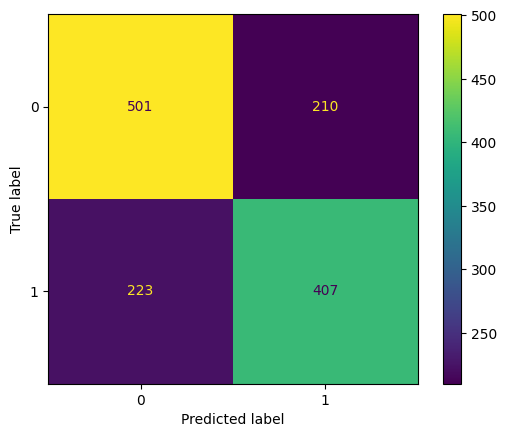

In [59]:
cm = metrics.confusion_matrix(y_test, svm_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(cm).plot()
plt.show()